# Module 2 Code Challenge

Welcome to your Module 2 Code Challenge. This code challenge is designed to test your understanding of the Module 2 material. It covers:

- Statistical Distributions
- Statistical Tests
- Bayesian Statistics
- Linear Regression

_Read the instructions carefully_. You will be asked both to write code and respond to a few short answer questions.

### Note on the short answer questions: 

For the short answer questions _please use your own words_. The expectation is that you have **not** copied and pasted from an external source, even if you consult another source to help craft your response. While the short answer questions are not necessarily being assessed on grammatical correctness or sentence structure, you should do your best to communicate yourself clearly.

In [1]:
# Run this cell without changes to import the necessary libraries

# Use any additional libraries you like to complete this assessment 

import itertools
import numpy as np
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pickle

from sklearn.metrics import mean_squared_error, roc_curve, roc_auc_score, accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.formula.api import ols

---
## Part 1: Statistical Distributions [Suggested time: 25 minutes]
---

### Normal Distributions

Say we have check totals for all checks ever written at a TexMex restaurant. 

The distribution for this population of check totals happens to be normally distributed with a population mean of $\mu = 20$ and population standard deviation of $\sigma = 2$. 

### 1.1) Write a function to compute the z-scores for single check of amount `check_amt`.

In [54]:
# Replace `pass` with appropriate code
def z_score(check_amt):
    z_calc = ((check_amt-20)/2)
    return z_calc

### 1.2) Use your function to compute the z-score for a 24 dollar check, and interpret the result using the empirical rule. 

In [55]:
# Code here 
samp_check = z_score(24)
samp_check

2.0

The Empirical Rule would tell me this value should fall within a certain confidence interval around the true population mean.

### 1.3) Using $\alpha = 0.05$, is the 24 dollar check significantly _greater_ than the mean? How do you know this?  

For reference, here is a link to a [z-table](https://www.math.arizona.edu/~rsims/ma464/standardnormaltable.pdf). 

In [56]:
# Code here 
p_val = stats.norm.sf(samp_check)
p_val

0.022750131948179195

I calculated the p-value above and it seems to be way less than 0.05 or even 0.025. This would signal to me that the result is significant due to:  
**p-val < alpha**

### Confidence Intervals and the Central Limit Theorem

### 1.4) Determine the 95% confidence interval around the mean check total for this population. Interpret your result. 

In [57]:
# Code here 
z_95 = stats.norm.ppf(0.975)
moe = z_95*(2)
ci_95 = ((20 - (z_95*moe)), (20 + (z_95*moe)))
ci_95

(12.31708235861175, 27.68291764138825)

From this, I can say that 95% of the sample means in the sample distribution should fall within these bounds (12.31708235861175, 27.68291764138825). 

### 1.5) Imagine that we didn't know how the population of check totals was distributed. How would _sampling_ and the _Central Limit Theorem_ allow us to make inferences on the population mean, i.e. estimate $\mu, \sigma$ of the population mean?

The CLT states that sample means will follow a normal distribution and converge on one central value (ie. the population mean). Following this logic, the sample standard deviation can also be used as a replacement. These rules will apply when the sample size is of sufficient size.

---
## Part 2: Statistical Testing [Suggested time: 15 minutes]
---

The TexMex restaurant recently introduced queso to its menu.

We have random samples of 1000 "no queso" order check totals and 1000 "queso" order check totals for orders made by different customers.

In the cell below, we load the sample data for you into the arrays `no_queso` and `queso` for the "no queso" and "queso" order check totals, respectively. Then, we create histograms of the distribution of the check amounts for the "no queso" and "queso" samples. 

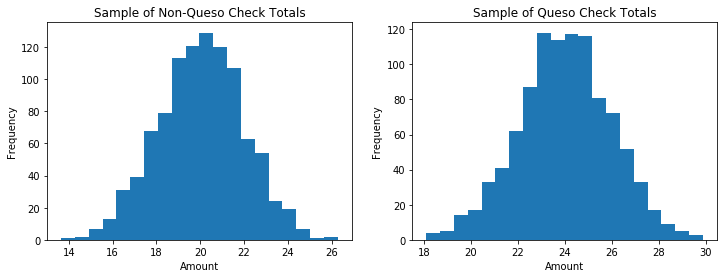

In [7]:
# Run this cell without changes

# Load the sample data 
no_queso = pickle.load(open('data/no_queso.pkl', 'rb'))
queso = pickle.load(open('data/queso.pkl', 'rb'))

# Plot histograms

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.set_title('Sample of Non-Queso Check Totals')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')
ax1.hist(no_queso, bins=20)

ax2.set_title('Sample of Queso Check Totals')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')
ax2.hist(queso, bins=20)
plt.show()

In [25]:
# no_queso

### Hypotheses and Errors

The restaurant owners want to know if customers who order queso spend **more or less** than customers who do not order queso.

### 2.1) Set up the null $H_{0}$ and alternative hypotheses $H_{A}$ for this test.

#### H0: Customers who order queso spend the same amount as those who did not order queso   
##### (x_bar_qu = x_bar_noqu).

#### H1: Customers who order queso do not spend the same amount as those who did not order queso   
##### (x_bar_qu != x_bar_noqu).

### 2.2) What does it mean to make `Type I` and `Type II` errors in this specific context?

A Type I error would mean that we concluded **incorrectly** it is possible that there is a difference in spending between customers who ordered queso vs those who didn't. (False +)
  
A Type II error would mean we concluded **incorrectly** that there is no difference in spending between those wh ordered queso vs those who did not. (False -)

### Sample Testing

### 2.3) Run a statistical test on the two samples. Can you reject the null hypothesis? 

Use a significance level of $\alpha = 0.05$. You can assume the two samples have equal variance.

You can use `scipy.stats` to find the answer if you like.  It has already been imported as `stats` and the statistical testing documentation can be found [here](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests).

In [9]:
# Code here 
test = stats.ttest_ind(queso, no_queso)
test

Ttest_indResult(statistic=45.16857748646329, pvalue=1.29670967092511e-307)

In [12]:
stats.t.ppf(1-0.025, (len(queso)+len(no_queso)-2))

1.9611520148367056

### When comparing the results, the **calculated T-Value** was greater than the **T-Critical**. Due to this, I can reject the null hypothesis in favor of the alternate.

---
## Part 3: Bayesian Statistics [Suggested time: 15 minutes]
---
### Bayes' Theorem

Thomas wants to get a new puppy 🐕 🐶 🐩 


<img src="https://media.giphy.com/media/rD8R00QOKwfxC/giphy.gif" />

He can choose to get his new puppy either from the pet store or the pound. The probability of him going to the pet store is $0.2$. 

He can choose to get either a large, medium or small puppy.

If he goes to the pet store, the probability of him getting a small puppy is $0.6$. The probability of him getting a medium puppy is $0.3$, and the probability of him getting a large puppy is $0.1$.

If he goes to the pound, the probability of him getting a small puppy is $0.1$. The probability of him getting a medium puppy is $0.35$, and the probability of him getting a large puppy is $0.55$.

### 3.1) What is the probability of Thomas getting a small puppy?
Show your work, not just the final result

In [20]:
# Code here to find the probability

# P(small|pet_store) + P(small|pound)

(0.6*0.2) + (0.8*0.1)
print('There is a 0.2 (20%) chance Thomas will get a small puppy.')

There is a 0.2 (20%) chance Thomas will get a small puppy.


### 3.2) Given that he got a large puppy, what is the probability that Thomas went to the pet store?
Show your work, not just the final result

In [40]:
# The chance is very low, considering he only has a 0.2 prob of going to the pet store.
# If he got a large dog, there is a 20% chance he went to the pet store.
# The overall probability of him getting a large dog is ~0.46 from either pound or store.
# Probability of him having bought a large dog, and it is from the pet store, is 0.112.
top = (0.1*0.2)*(0.2)
bottom = ((0.1*0.2)*(0.2)) + (0.55*0.8)*(0.8)
prob_L_pet = top/bottom
prob_L_pet
print('Probability =', prob_L_pet)

Probability = 0.011235955056179775


### 3.3) Given that Thomas got a small puppy, is it more likely that he went to the pet store or to the pound?
Show your work, not just the final result

I compared the probability that he went to the pet store given he got a small dog VS the probability that he went to the pound given he got a small dog.

Considering he is 4X more likely to go to the pound, the results below show me that he is more likely to have gotten a small dog at the pound. **prob_S_pound > prob_S_pet**

In [41]:
top = (0.6*0.2)*(0.2)
bottom = ((0.6*0.2)*(0.2)) + (0.1*0.8)*(0.8)
prob_S_pet = top/bottom
prob_S_pet
print('Probability =', prob_S_pet)

Probability = 0.27272727272727265


In [45]:
top = (0.1*0.8)*(0.8)
bottom = ((0.1*0.8)*(0.8)) + (0.6*0.2)*(0.2)
prob_S_pound = top/bottom
prob_S_pound
print('Probability =', prob_S_pound)

Probability = 0.7272727272727273


### 3.4) For Question 3.2, what are the prior, posterior, and likelihood?

* Prior = 0.2 or P(pet_store)
* Posterior = P(pet_store|large_dog)
* Likelihood = P(large_dog|pet_store)

---
## Part 4: Linear Regression [Suggested Time: 10 min]
---

In this section, you'll be using the Advertising data, and you'll be creating linear models that are more complicated than a simple linear regression. The relevant modules have already been imported at the beginning of this notebook. We'll load and prepare the dataset for you below.

In [13]:
# Run this cell without changes

data = pd.read_csv('data/advertising.csv').drop('Unnamed: 0', axis=1)
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
# Run this cell without changes

X = data.drop('sales', axis=1)
y = data['sales']

In the linear regression section of the curriculum, you analyzed how TV, Radio, and Newspaper spendings individually affected the Sales figures. Here, we'll use all three together in a multiple linear regression model!

### 4.1) Create a Correlation Matrix for `X`.

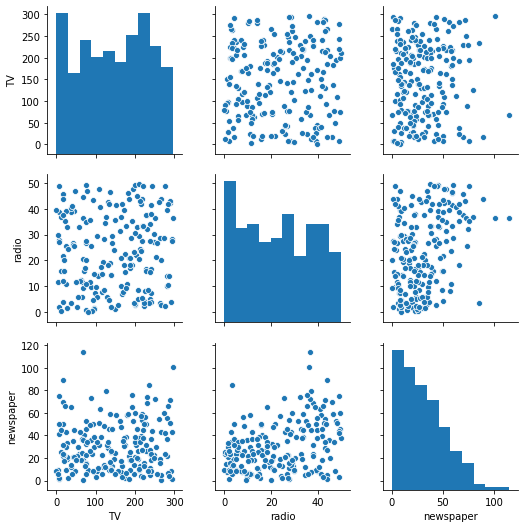

In [15]:
# Code here 
sns.pairplot(X)

In [46]:
X.corr()

,TV,radio,newspaper
TV,1.000000,0.054809,0.056648
radio,0.054809,1.000000,0.354104
newspaper,0.056648,0.354104,1.000000


### 4.2) Based on this correlation matrix only, would you recommend to use `TV`, `radio`, and `newspaper` in the same multiple linear regression model?

Based on my pairplot, I can use all three because they don't seem to show any correlation between one another. **However** there is a slight correlation between radio and newspaper. I cannot determine if the correlation rate is enough to swing the model in any direction. Would have to test it out.

### 4.3) Use StatsModels' `ols`-function to create a multiple linear regression model with `TV`, `radio`, and `newspaper` as independent variables and `sales` as the dependent variable. 

**Required output:** the model summary of this multiple regression model.

In [24]:
# Code here 

comp = ols('sales~TV+radio+newspaper', data=data).fit()
comp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Thu, 19 Mar 2020   Prob (F-statistic):           1.58e-96
Time:                        10:19:31   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 4.4) Do we have any statistically significant coefficients? If the answer is yes, list them below.

* TV: p-value < 0.05
* radio: p-value < 0.05